# 🌡 Physical Calculations

In [ ]:
import parmesan
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

## Read Data

`bme280.csv` contains data from a [Bosch BME280](https://www.bosch-sensortec.com/products/environmental-sensors/humidity-sensors-bme280/) sensor.

In [ ]:
data = pd.read_csv("bme280.csv", parse_dates=["datetime"], index_col=0)
data

This is what the data looks like:

In [ ]:
fig, axes = plt.subplots(ncols=3)
for (column, values), ax in zip(data.items(), axes):
    values.plot(ax=ax)
    ax.set_title(column)
fig.tight_layout()
fig.autofmt_xdate()

## Calculate Potential Temperature

Let's calculate the potential temperature. We can use the `potential_temperature`-function for this. Use the search function of [the documentation](https://tue-umphy.gitlab.io/software/parmesan) to see how to use that function. You should see something like this, your mileage may vary:

| Searching for `potential temperature`|
|--------------------------------------|
| 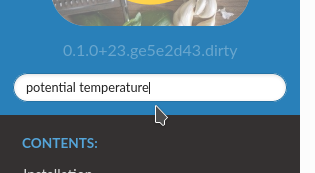 |

| Search Results for  `potential temperature`          |
|------------------------------------------------------|
|  |

| Documentation for `potential_temperature()` |
|---------------------------------------------|
|      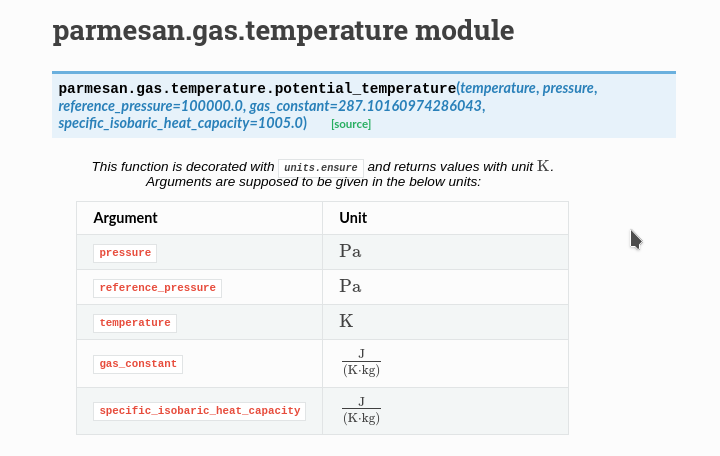 |

Now that we know how the function works, let's use it:

In [ ]:
from parmesan.gas.temperature import potential_temperature

Our data is not in the required units. One possibility is to convert the values by hand:

In [ ]:
# BAD DON'T DO THIS
potential_temperature(
    temperature=data.temperature + 273.15,  # turn °C to Kelvin
    pressure=data.pressure * 100,  # hPa to Pa
)

However manual conversion can go wrong quickly. It is more elegant to directly supply the proper [pint](https://pint.readthedocs.io/en/stable/)-unit to our data: 

In [ ]:
from parmesan.units import units

In [ ]:
potential_temperature(
    # as °C is a strange, non-multiplicative unit (unlike most units),
    # we can't just multiply units.celsius to the values. Instead we need
    # to do it like this:
    temperature=units.Quantity(data.temperature.values, "celsius"),
    # hPa on the other hand is a normal multiplicative unit,
    # so we can just multiply it to our data:
    pressure=data.pressure.values * units.hPa,
)

> Note: We're using the plain numpy arrays `data.pressure.values` and `data.temperature.values` here instead of just  `data.temperature` and `data.pressure` because the latter are fancy pandas Series objects which for some reason can't directly have a [pint](https://pint.readthedocs.io/en/stable/)-unit multiplied to them. Oh, well...

We can also directly convert the result back to °C:

In [ ]:
potential_temperature(
    temperature=units.Quantity(data.temperature.values, "celsius"),
    pressure=data.pressure.values * units.hPa,
).to("celsius")